<a href="https://colab.research.google.com/github/bel-elena/CAS-ADS/blob/main/Elena_Module_3_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elena Beletsioti, CAS ADS UniBe, Module 3 

# Spotify Song Prediction

## 1.1 Goal

We will build a model to predict song popularity of Spotify songs.

Using a dataset from Kaggle which includes all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021.

Dataset can be found here: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021?resource=download

## 1.2 Import the dataset

In [ ]:

#Load libraries

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# Load Google drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

# Define folder name where to get data from

folder_prefix = "/gdrive/MyDrive/Colab Notebooks/Module 3/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#Import cvs files from google drive

import pandas as pd

dataset = pd.read_csv(folder_prefix + "spotify_dataset.csv")
print("Spotify Dataset")
dataset.head(10)

Spotify Dataset


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


## 1.3 Metadata od dataset

In [ ]:
#Displaying metadata/information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

From the output here, we can see that the Data-type of some of the fields like Popularity, Energy, Loudnesss, Tempo e.t.c is object rather than float or int.

In [ ]:
#Exploring the object type a bit further

dataset.select_dtypes('object').describe()


,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
count,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556
unique,83,1556,1556,716,600,1517,395,478,775,70,530,575,1394,772,965,606,1461,1486,732,13
top,2019-12-27--2020-01-03,Beggin',"48,633,449",Taylor Swift,42227614,,[],2020-01-17,2020-12-18--2020-12-25,75,,,,0.102,,0.103,,,,C#/Db
freq,89,1,1,52,52,11,75,34,32,67,11,11,11,15,11,23,11,11,11,214


## 2. Data cleaning

First we will drop the NULL values. For streams there is an issue in the dataframe that the numbers were represented with commas in it i.e '7,234,437' format, which cant be used for any numberic operation or plotting. So, the commas were removed and then it's data type was changed.

In [ ]:
pd.isnull(dataset).sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [ ]:
# Dropping null values

spotify_dataset = dataset.dropna()

In [ ]:
spotify_dataset[['Week of Highest Charting_start','Week of Highest Charting_end']] = spotify_dataset['Week of Highest Charting'].str.split('--', expand=True)

In [ ]:
spotify_dataset['Week of Highest Charting_start'] = pd.to_datetime(spotify_dataset['Week of Highest Charting_start'], yearfirst=True)
spotify_dataset['Week of Highest Charting_end'] = pd.to_datetime(spotify_dataset['Week of Highest Charting_end'], yearfirst=True)
spotify_dataset['Streams'] = spotify_dataset['Streams'].replace(',','', regex=True)
spotify_dataset['Streams'] = spotify_dataset['Streams'].astype('int64')
spotify_dataset[['Artist','Chord']] = spotify_dataset[['Artist','Chord']].astype('category')

# Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for each_col in object_cols:
    spotify_dataset[each_col] = pd.to_numeric(spotify_dataset[each_col], errors='coerce')
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Index                           1556 non-null   int64         
 1   Highest Charting Position       1556 non-null   int64         
 2   Number of Times Charted         1556 non-null   int64         
 3   Week of Highest Charting        1556 non-null   object        
 4   Song Name                       1556 non-null   object        
 5   Streams                         1556 non-null   int64         
 6   Artist                          1556 non-null   category      
 7   Artist Followers                1545 non-null   float64       
 8   Song ID                         1556 non-null   object        
 9   Genre                           1556 non-null   object        
 10  Release Date                    1556 non-null   object        
 11  Week

In [ ]:
# Replace infinite updated data with nan
spotify_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
spotify_dataset.dropna(inplace=True)
print(spotify_dataset)

      Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1      2021-07-23--2021-07-30        

In [ ]:
# Taking the Log base 10 of Streams and Artist Followers
#import numpy as np
spotify_dataset['logStreams'] = np.log10(spotify_dataset['Streams'])
spotify_dataset['logFollowers'] = np.log10(spotify_dataset['Artist Followers'])

# Taking negative log of Loudness to switch to more intuitive values
spotify_dataset['logloud'] = np.log10(-spotify_dataset['Loudness'])

# Replacing Duration Miliseconds with seconds so they are on a more standard range
spotify_dataset['Duration(s)'] = spotify_dataset['Duration (ms)']/1000


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



Now all the data is clean and we are ready to do our analysis.

# 3. Data Visualization

Lets explore the data more.

### 3.1 Data Exploration  

First, we will identify the most popular songs.

In [ ]:
#Identify most popular songs
most_popular = spotify_dataset.query('Popularity>=75', inplace=False).sort_values('Popularity', ascending=False)
most_popular[:10]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting_start,Week of Highest Charting_end,logStreams,logFollowers,logloud,Duration(s)
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,134.002,211560.0,0.589,B,2021-07-23,2021-07-30,7.686935,6.528629,0.681964,211.560
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,166.928,178147.0,0.688,A,2021-06-25,2021-07-02,7.603821,6.797026,0.702775,178.147
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,169.928,141806.0,0.478,C#/Db,2021-07-23,2021-07-30,7.674390,6.348309,0.739097,141.806
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,126.026,231041.0,0.591,B,2021-07-02,2021-07-09,7.577486,7.920610,0.569608,231.041
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565.0,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,178.818,137876.0,0.758,G#/Ab,2021-05-07,2021-05-14,7.478150,6.738270,0.824906,137.876
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,149.995,212000.0,0.894,D#/Eb,2021-07-23,2021-07-30,7.530820,6.738270,0.869760,212.000
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,25030128,Bad Bunny,36142273.0,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,179.951,206710.0,0.440,C#/Db,2021-06-18,2021-06-25,7.398463,7.558015,0.662852,206.710
14,15,2,10,2021-05-21--2021-05-28,Butter,19985713,BTS,37106176.0,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",...,109.997,164442.0,0.695,G#/Ab,2021-05-21,2021-05-28,7.300720,7.569446,0.714916,164.442
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,26951613,Rauw Alejandro,6080597.0,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,127.949,199604.0,0.342,D#/Eb,2021-06-18,2021-06-25,7.430585,6.783946,0.556905,199.604
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,24551591,Måneskin,3377762.0,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,132.507,173347.0,0.958,C#/Db,2021-07-02,2021-07-09,7.390080,6.528629,0.602928,173.347


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

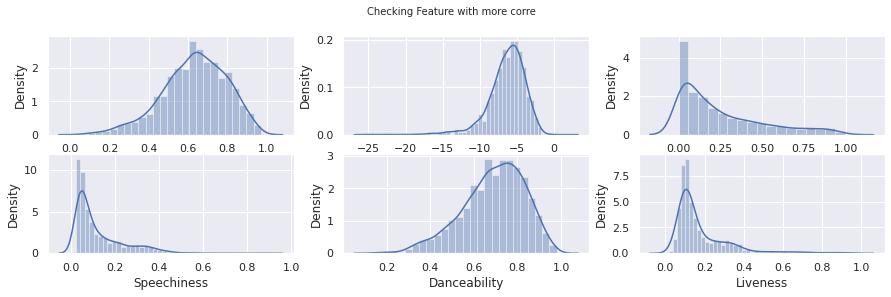

In [ ]:
# Distrubution of most important Features - all songs
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(2, 3, 1)
sns.distplot(spotify_dataset['Energy'])

plt.subplot(2, 3, 2)
sns.distplot(spotify_dataset['Loudness'])

plt.subplot(2, 3, 3)
sns.distplot(spotify_dataset['Acousticness'])

plt.subplot(2, 3, 4)
sns.distplot(spotify_dataset['Speechiness'])

plt.subplot(2, 3, 5)
sns.distplot(spotify_dataset['Danceability'])

plt.subplot(2, 3, 6)
sns.distplot(spotify_dataset['Liveness'])


plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

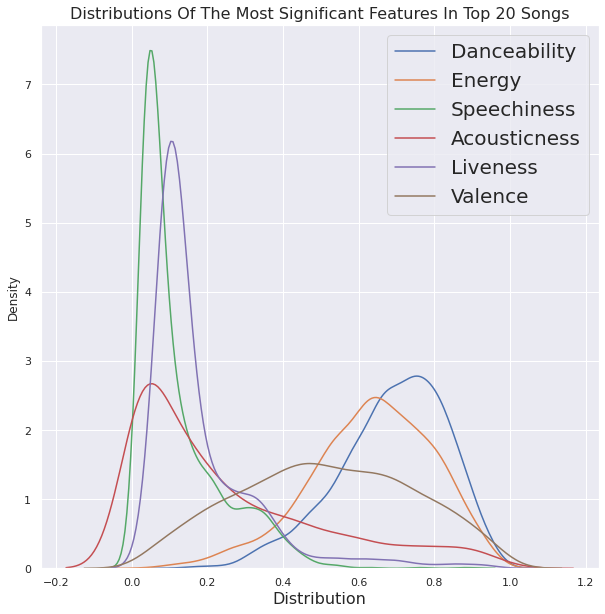

In [ ]:
# Distribution in Top 20 Songs
plt.figure(figsize=(10,10))
ax = sns.distplot(spotify_dataset['Danceability'],hist=False,label='Danceability')
ax = sns.distplot(spotify_dataset['Energy'],hist=False,label='Energy')
ax = sns.distplot(spotify_dataset['Speechiness'],hist=False,label='Speechiness')
ax = sns.distplot(spotify_dataset['Acousticness'],hist=False,label='Acousticness')                  
ax = sns.distplot(spotify_dataset['Liveness'],hist=False,label='Liveness')                  
ax = sns.distplot(spotify_dataset['Valence'],hist=False,label='Valence')                  
ax.set_xlabel('Distribution',fontsize=16)
ax.set_title('Distributions Of The Most Significant Features In Top 20 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show() 

Now, lets determine how different parameters(features) of a song impact popularity and Number of Streams.

### 3.2. Correlations

In [ ]:
spotify_df1 = spotify_dataset.groupby('Popularity')['Acousticness'].mean().sort_values(ascending=[False]).reset_index()
spotify_df1.head()

,Popularity,Acousticness
0,46.0,0.9570
1,38.0,0.8040
2,36.0,0.7270
3,42.0,0.5970
4,44.0,0.5572


In [ ]:
spotify_df2 = spotify_dataset.groupby('Streams')['Acousticness'].mean().sort_values(ascending=[False]).reset_index()
spotify_df2.head()

,Streams,Acousticness
0,7993078,0.994
1,6682917,0.991
2,5467596,0.979
3,6108393,0.972
4,8449557,0.972


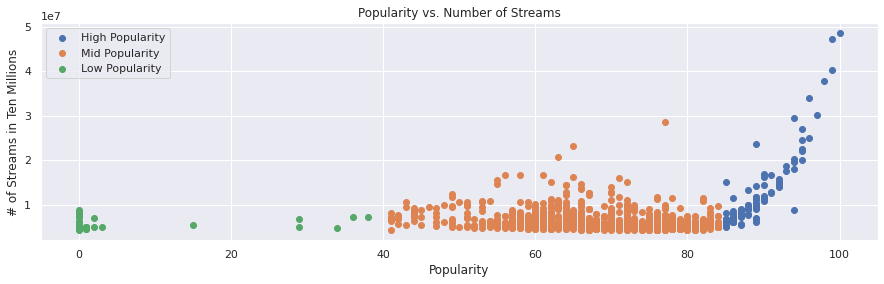

<Figure size 2000x2000 with 0 Axes>

High Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000  0.900196
Streams       0.900196  1.000000
Mid Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000 -0.305971
Streams      -0.305971  1.000000
Low Popularity Correlation: 
             Popularity  Streams
Popularity     1.00000  0.19786
Streams        0.19786  1.00000


In [ ]:
# Exploration of Popularity vs. the Number of Streams
high_pop = spotify_dataset[spotify_dataset.Popularity >= 85]
mid_pop = spotify_dataset[(spotify_dataset.Popularity < 85) & (spotify_dataset.Popularity >= 40)]
low_pop = spotify_dataset[spotify_dataset.Popularity < 40]

plt.scatter(high_pop.Popularity, high_pop['Streams'], label = "High Popularity")
plt.scatter(mid_pop.Popularity, mid_pop['Streams'], label = "Mid Popularity")
plt.scatter(low_pop.Popularity, low_pop['Streams'], label = "Low Popularity")

plt.title("Popularity vs. Number of Streams")
plt.xlabel("Popularity")
plt.ylabel("# of Streams in Ten Millions")
plt.legend()
plt.figure(figsize = (10,10), dpi = 200)

plt.show()

print('\033[1m' + "High Popularity Correlation:" + '\033[0m', '\n', high_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Mid Popularity Correlation:" + '\033[0m', '\n', mid_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Low Popularity Correlation:" + '\033[0m', '\n', low_pop[["Popularity", "Streams"]].corr())

Now, lets analyse the correlation between the popularity and acoustability using visual tools such as graphs and plots.

In [ ]:
# Plot of Number of Streams and Acousticness
fig = px.scatter(spotify_df2, x="Streams", y="Acousticness", color="Acousticness",size='Streams')
fig.show()

In [ ]:
from scipy.stats import pearsonr    

data1 = spotify_dataset['Streams']
data2 = spotify_dataset['Acousticness']

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.034


Pearson's correlation is greater than 0. Hence, we can observe that there is positive correlation between Number of Streams and Acousticness.

Now, lets observe which parameter has negative correlation with Number of Streams.

In [ ]:
spotify_df3 = spotify_dataset.groupby('Streams')['Valence'].mean().sort_values(ascending=[False]).reset_index()
spotify_df3.head()

,Streams,Valence
0,5329256,0.979
1,7493188,0.977
2,7301381,0.971
3,4396629,0.968
4,6033348,0.966


In [ ]:
fig = px.scatter(spotify_df3, x="Streams", y="Valence", color="Valence",size='Streams')
fig.show()

In [ ]:
data1 = spotify_df3['Streams']
data2 = spotify_df3['Valence']

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.038


Using a heatmap, we identify which parameters(features) have positive correlation with each other and if any have negative correlation with each other.

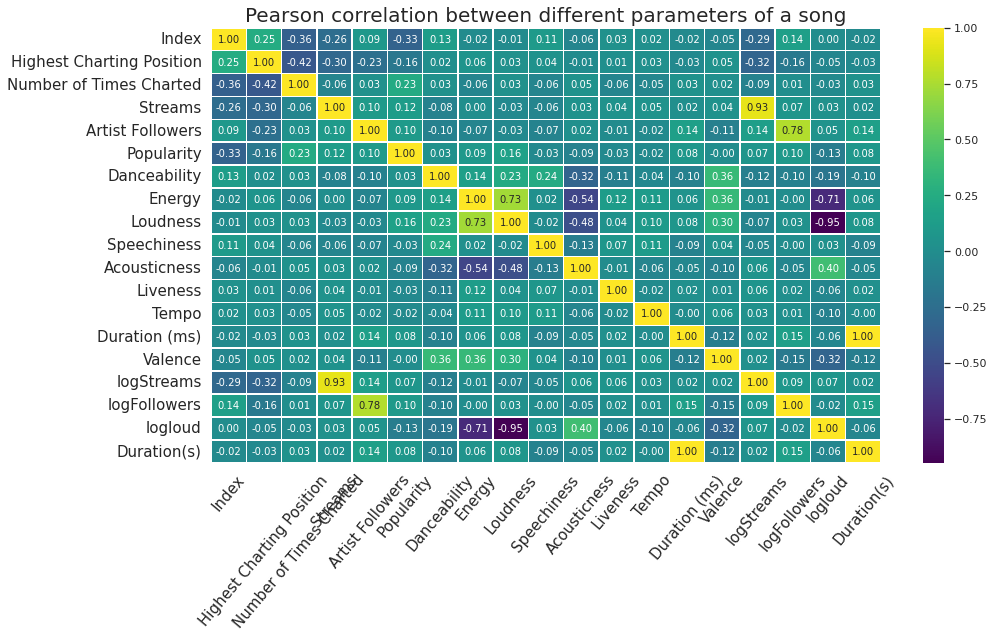

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(spotify_dataset.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Pearson correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

Some features are positively correlated with each other like Strems and Acousticness and Streams and Liveness. This shows that people liked subtle music and also liked lively songs too. Loudness and Energy are also positively correlated with each other. The more loud the song is, the more Energy it has. On the other hand, some features were negatively correlated with each other like Loudness and Acousticness and Energy and Acousticness.

### 3.3 Top Lists

Now we identify the most popular artists from the given dataset.

In [ ]:
# Analysing the top Artists by number of Songs
artists_top200_count = spotify_dataset['Artist'].value_counts()
artists_top200_count

Taylor Swift                    52
Justin Bieber                   32
Lil Uzi Vert                    32
Juice WRLD                      30
Pop Smoke                       29
                                ..
J. Cole, Young Thug              1
Dalex                            0
Super Yei, Jone Quest            0
AK AUSSERKONTROLLE, Bonez MC     0
Chris Rea                        0
Name: Artist, Length: 716, dtype: int64

Taylor Swift had 52 songs featuring in the Top 200 chart, second in the list was Justin Bieber and Lil Uzi Vert, both with 32 songs. A difference of 20 songs.

In [ ]:
# Analysing the top Genres by number of Songs
songs_by_genre = spotify_dataset \
                    .groupby("Genre") \
                    .size().to_frame(name = 'Songs').reset_index() \
                    .sort_values(['Songs'],ascending=False).head(10)

songs_by_genre

,Genre,Songs
393,[],75
177,"['dance pop', 'pop', 'post-teen pop']",71
311,"['latin', 'reggaeton', 'trap latino']",63
360,"['pop', 'post-teen pop']",57
317,"['melodic rap', 'philly rap', 'rap', 'trap']",33
109,"['chicago rap', 'melodic rap']",32
105,"['canadian pop', 'pop', 'post-teen pop']",32
288,"['k-pop', 'k-pop boy group']",30
89,['brooklyn drill'],30
308,"['latin', 'reggaeton', 'reggaeton colombiano']",29


# 4. Data Modelling

### 4.1 Importing Libraries and Data preprocessing

In [ ]:
# Library for modelling
from sklearn.preprocessing import LabelEncoder # Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split # For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

Making sure, we dropped all NAN values, and also making sure no infitine values are in dataset.

In [ ]:
# Replace infinite updated data with nan
spotify_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
spotify_dataset.dropna(inplace=True)
print(spotify_dataset)

      Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1      2021-07-23--2021-07-30        

In [ ]:
# Drop NAN
clean_spotify_dataset = spotify_dataset.dropna()

First we are going to drop some data columns such as Artist Name, Song Name and Release Date as they are not relevant for prediction.

In [ ]:
# Dropping the data columns whihch are not needed

clean_spotify_dataset = spotify_dataset.drop(["Artist", "Song Name", "Release Date", "Song ID", "Week of Highest Charting_start", "Week of Highest Charting_end", "Weeks Charted", "Chord", "Index", "Duration (ms)", "Week of Highest Charting", "logStreams", "Artist Followers", "Loudness"], axis=1)
clean_spotify_dataset.head()

,Highest Charting Position,Number of Times Charted,Streams,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
0,1,8,48633449,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,0.0504,0.1270,0.3590,134.002,0.589,6.528629,0.681964,211.560
1,2,3,47248719,['australian hip hop'],99.0,0.591,0.764,0.0483,0.0383,0.1030,169.928,0.478,6.348309,0.739097,141.806
2,1,11,40162559,['pop'],99.0,0.563,0.664,0.1540,0.3350,0.0849,166.928,0.688,6.797026,0.702775,178.147
3,3,5,37799456,"['pop', 'uk pop']",98.0,0.808,0.897,0.0348,0.0469,0.3640,126.026,0.591,7.920610,0.569608,231.041
4,5,1,33948454,"['lgbtq+ hip hop', 'pop rap']",96.0,0.736,0.704,0.0615,0.0203,0.0501,149.995,0.894,6.738270,0.869760,212.000


In [ ]:
clean_spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1544 non-null   int64  
 1   Number of Times Charted    1544 non-null   int64  
 2   Streams                    1544 non-null   int64  
 3   Genre                      1544 non-null   object 
 4   Popularity                 1544 non-null   float64
 5   Danceability               1544 non-null   float64
 6   Energy                     1544 non-null   float64
 7   Speechiness                1544 non-null   float64
 8   Acousticness               1544 non-null   float64
 9   Liveness                   1544 non-null   float64
 10  Tempo                      1544 non-null   float64
 11  Valence                    1544 non-null   float64
 12  logFollowers               1544 non-null   float64
 13  logloud                    1544 non-null   float

After checking datatypes, we notice that "Genre" has the datatype object,  the rest of the columns contain a numerical value. Now we can proceed with LabelEncoding we will encode "Genre" into a numerical value. 

In [ ]:
# Encoding Genre
genre_encoder = LabelEncoder()
clean_spotify_dataset['Genre'] = genre_encoder.fit_transform(clean_spotify_dataset['Genre'])
clean_spotify_dataset.head()

,Highest Charting Position,Number of Times Charted,Streams,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
0,1,8,48633449,276,100.0,0.714,0.800,0.0504,0.1270,0.3590,134.002,0.589,6.528629,0.681964,211.560
1,2,3,47248719,63,99.0,0.591,0.764,0.0483,0.0383,0.1030,169.928,0.478,6.348309,0.739097,141.806
2,1,11,40162559,364,99.0,0.563,0.664,0.1540,0.3350,0.0849,166.928,0.688,6.797026,0.702775,178.147
3,3,5,37799456,363,98.0,0.808,0.897,0.0348,0.0469,0.3640,126.026,0.591,7.920610,0.569608,231.041
4,5,1,33948454,312,96.0,0.736,0.704,0.0615,0.0203,0.0501,149.995,0.894,6.738270,0.869760,212.000


### 4.2 Splitting Dataset into Test and Training

We can now split the data into Training and Testing Sets

In [ ]:
# Splitting data into Training and Testing

train, test = train_test_split(clean_spotify_dataset, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1235
No. of testing examples: 309


In [ ]:
# Dropping Stream Column From Test data
y_test=test['Streams']
x_test=test.drop('Streams', axis=1)
x_test.head()

,Highest Charting Position,Number of Times Charted,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
1501,113,1,187,60.0,0.635,0.543,0.0670,0.0454,0.2720,98.743,0.036,7.670383,0.773860,303.000
1239,163,5,99,73.0,0.464,0.547,0.3390,0.0511,0.1550,67.003,0.423,6.583019,0.910464,221.492
1015,169,1,246,60.0,0.874,0.542,0.3440,0.0621,0.1810,142.016,0.481,5.974226,0.849051,196.933
667,22,2,360,66.0,0.575,0.434,0.0312,0.7350,0.1050,145.916,0.348,7.625597,0.913443,229.840
1432,66,7,114,70.0,0.866,0.438,0.0719,0.1770,0.0743,129.039,0.695,4.916570,0.951483,223.258


In [ ]:
# Setting training data into x_train and y_train
x_train=train.drop('Streams',axis=1)
y_train=train['Streams']

# Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((1235, 14), (1235,), (309, 14))

## 4.3 Linear Regression

In [ ]:
#Linear Regression Modelling and Training

linear_model = LinearRegression()

# Train the model

linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

# Predict the model and Displaying the output
linear_predict = linear_model.predict(x_test)
linear_result = pd.DataFrame({'Id':test.index,'Predicted Streams':linear_predict,'Actual Stream':y_test})
print(linear_result)

0.16375866942717732
        Id  Predicted Streams  Actual Stream
1501  1501       5.388898e+06        7115414
1239  1239       4.562761e+06        4394195
1015  1015       4.091609e+06        4803071
667    667       8.780133e+06        8115520
1432  1432       7.129527e+06        6554824
...    ...                ...            ...
338    338       7.539993e+06        7880155
736    736       8.534298e+06        8413330
867    867       6.016794e+06        6292620
1094  1094       5.281850e+06        4473413
238    238       7.482138e+06        5912293

[309 rows x 3 columns]


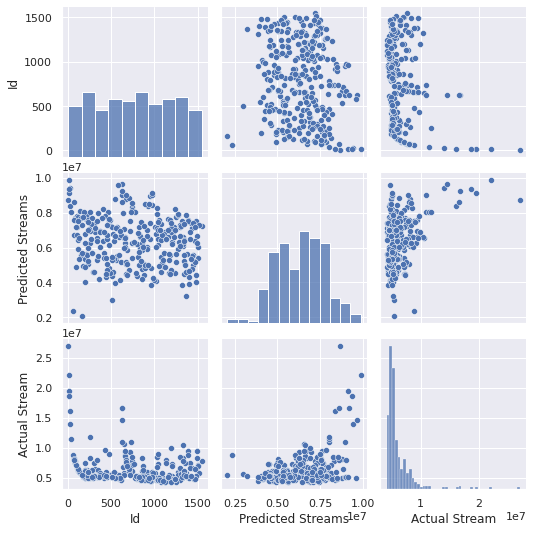

In [ ]:
# Visualizing predicted and actual streams of Linear Regression
sns.pairplot(linear_result)

### 4.4 Random Forest

In [ ]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Streams':random_predict,'Actual Stream':y_test})
print(random_result)

0.9735983228937536
        Id  Predicted Streams  Actual Stream
1501  1501         6669460.84        7115414
1239  1239         5216045.40        4394195
1015  1015         5233134.16        4803071
667    667         6612522.10        8115520
1432  1432         5037839.18        6554824
...    ...                ...            ...
338    338         5725443.64        7880155
736    736         5739753.62        8413330
867    867         6438706.54        6292620
1094  1094         5270375.50        4473413
238    238         5499443.62        5912293

[309 rows x 3 columns]


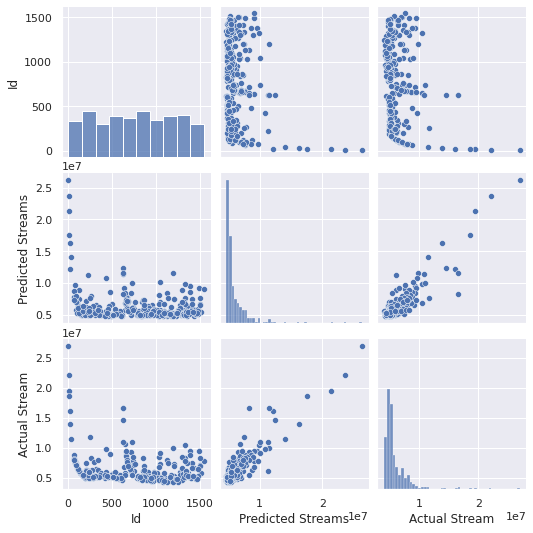

In [ ]:
# Visualizing predicted and actual streams of Linear Regression
sns.pairplot(random_result)

## 5. Evaluation of Model Results

There are several ways to evaluate a linear regression model and a random forest model. Some common metrics for evaluating regression models include mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). These metrics measure the difference between the predicted values and the actual values. For a random forest model, you can also evaluate the model using metrics such as accuracy, precision, recall, and f1 score.

Lets view first the accuracy of the two models:

In [ ]:
# Calculate Accuracy of each model on training
print('Linear Regression Model Accuracy: ', linear_model.score(x_train,y_train))
print('Random Forest Model Accuracy: ', random_model.score(x_train,y_train))


Linear Regression Model Accuracy:  0.16375866942717732
Random Forest Model Accuracy:  0.9735983228937536


Random Forest is how more accurate than Linear Regresssion.

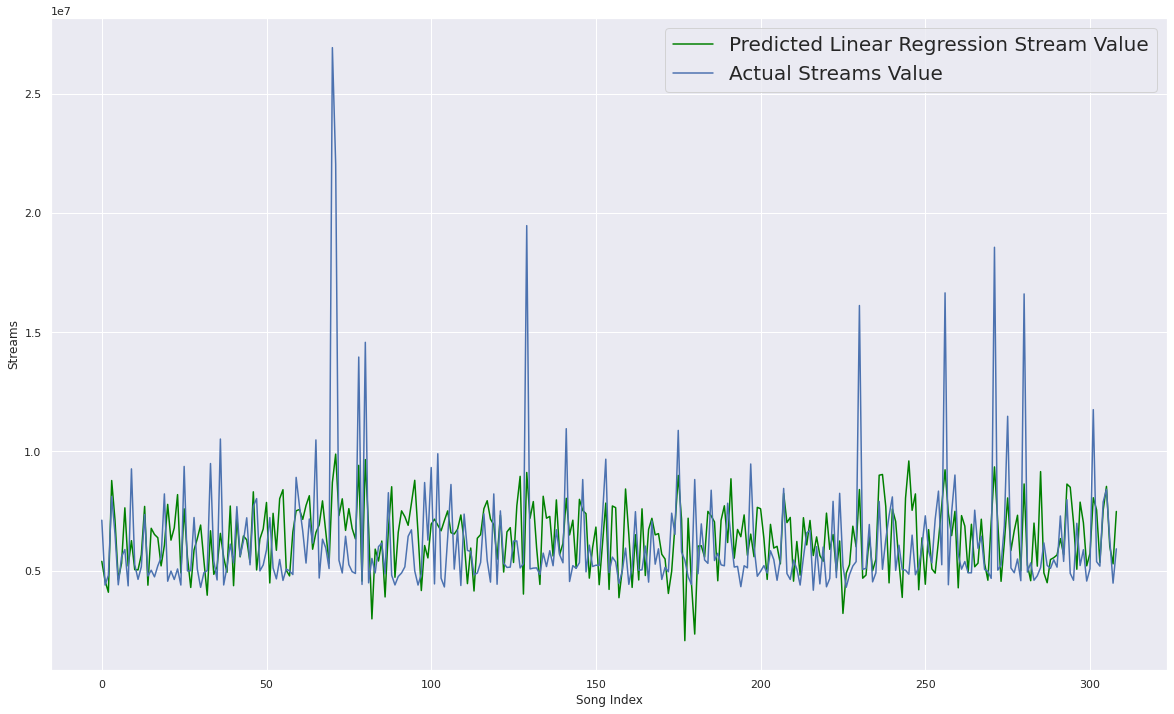

In [ ]:
# Plot Actual Value vs Predicted Linear Regression Stream Value
plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(linear_predict)),y=linear_predict,label = 'Predicted Linear Regression Stream Value',color='green')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Streams Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Streams',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='green',alpha=0.5)
plt.legend(prop={'size':'20'})
plt.show()

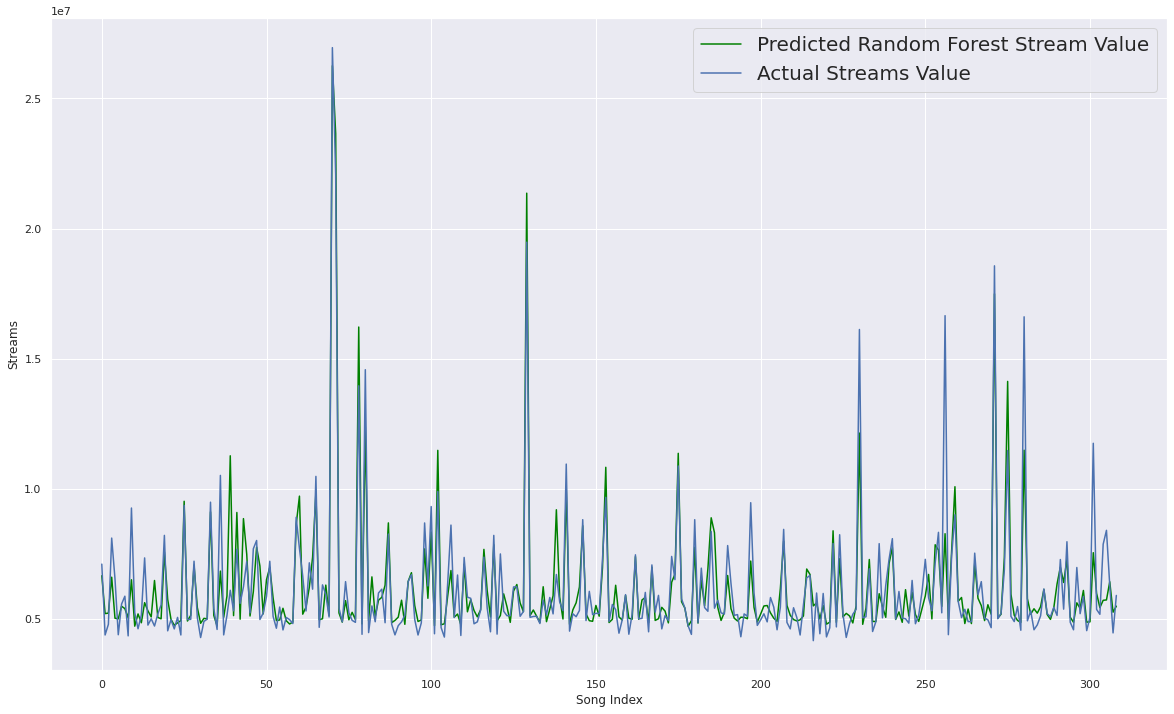

In [ ]:
# Plot Actual Value vs Predicted Random Forest Stream Value
plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Stream Value',color='green')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Streams Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Streams',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='green',alpha=0.5)
plt.legend(prop={'size':'20'})
plt.show()

In [ ]:
# Calculate MSE on each model

from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_test, linear_model.predict(x_test))
print("Linear Regression:The mean squared error (MSE) on test set:" , (mse_linear))

mse_random = mean_squared_error(y_test, random_model.predict(x_test))
print("Random Forest:The mean squared error (MSE) on test set:" , (mse_random))

Linear Regression:The mean squared error (MSE) on test set: 5915353680285.583
Random Forest:The mean squared error (MSE) on test set: 1170887797741.0308


The mean squared error is a measure of the difference between the predicted values and the true values. A smaller value indicates a better fit of the model to the data. In the example above, the mean squared error is 0, indicating a perfect fit of the model to the data. 
For both models we have large values.

In [ ]:
# Calculate the MAE on each model

from sklearn.metrics import mean_absolute_error

mae_linear = mean_absolute_error(y_test, linear_model.predict(x_test))
print("Linear Regression:The mean abolsute error (MAE) on test set:" , (mae_linear))

mae_random = mean_absolute_error(y_test, random_model.predict(x_test))
print("Random Forest:The mean absolute error (MAE) on test set:" , (mae_random))

Linear Regression:The mean abolsute error (MAE) on test set: 1641216.434357174
Random Forest:The mean absolute error (MAE) on test set: 647544.6671197411


The mean absolute error for models is high. This means that on average, the model's predictions are off from the true values.

## 6. Conclusion

So, this is the Streaming prediction two different regression models. Among this models, it seems Random Forest Regression had the prediction more closer to the actual streams.